In [1]:
load("5.R.RData")

In [2]:
ls()

[1] "Xy"

In [3]:
head(Xy)

,X1,X2,y
,<dbl>,<dbl>,<dbl>
1,1.297720,0.8059212,0.2989683
2,1.267323,0.7990341,0.3181337
3,1.236882,0.7921693,0.3372015
4,1.206317,0.7852963,0.3561210
5,1.175553,0.7783848,0.3748415
6,1.144513,0.7714042,0.3933122


In [4]:
library(MASS)

In [5]:
model = glm(y ~ X1 + X2, data = Xy)

In [6]:
summary(model)


Call:
glm(formula = y ~ X1 + X2, data = Xy)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.26583    0.01988  13.372  < 2e-16 ***
X1           0.14533    0.02593   5.604 2.71e-08 ***
X2           0.31337    0.02923  10.722  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.2971417)

    Null deviance: 335.56  on 999  degrees of freedom
Residual deviance: 296.25  on 997  degrees of freedom
AIC: 1629.3

Number of Fisher Scoring iterations: 2


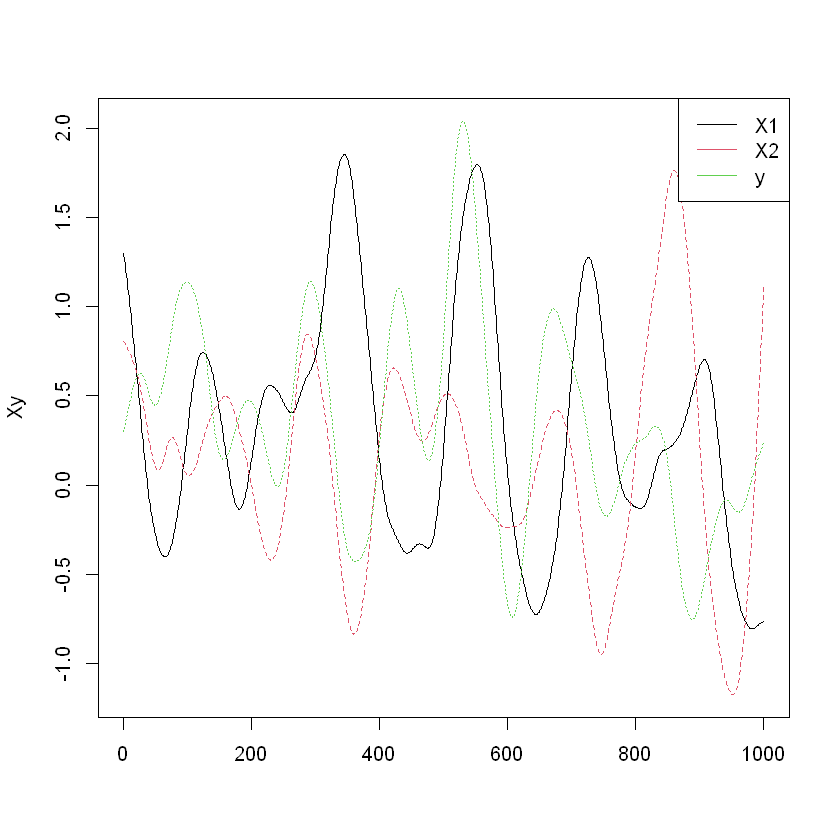

In [7]:
matplot(Xy, type = "l")
legend("topright", legend = colnames(Xy), col = 1:5, lty = 1)

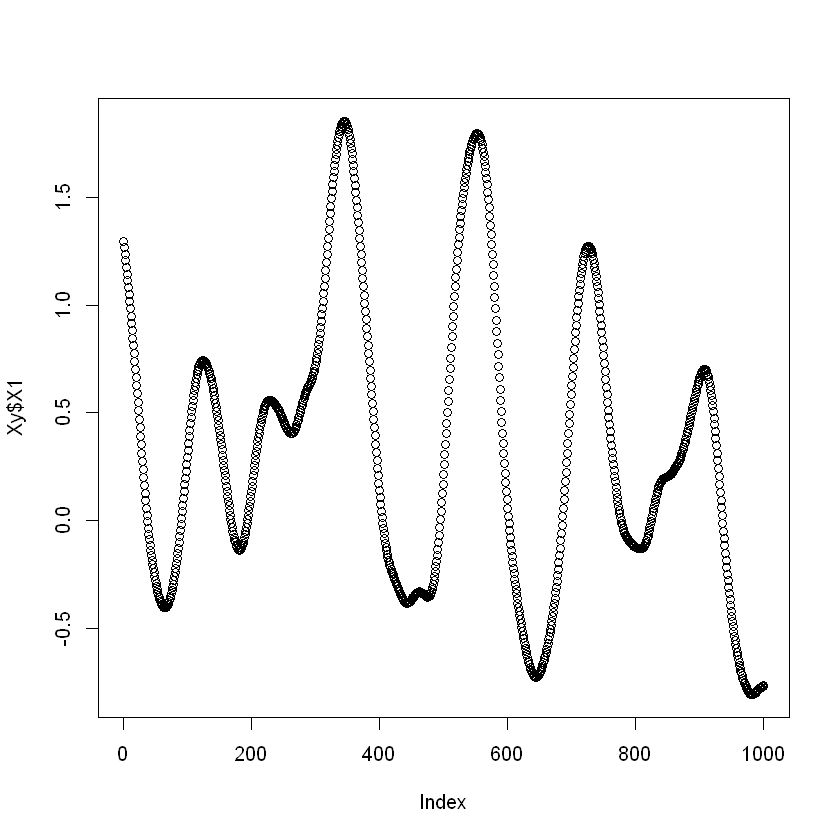

In [8]:
plot(Xy$X1)

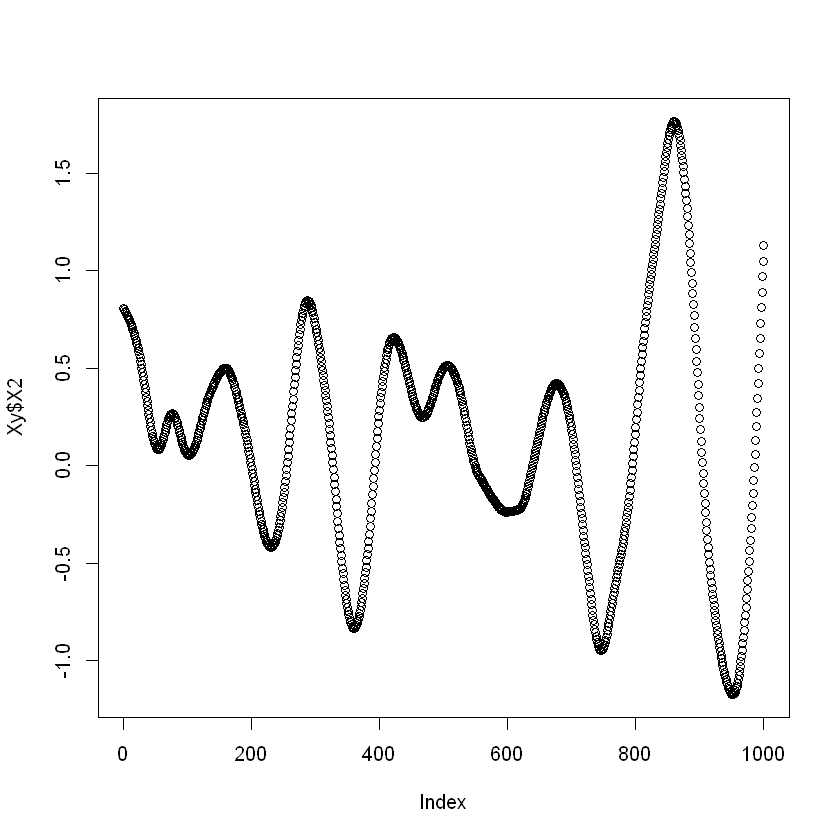

In [9]:
plot(Xy$X2)

In [10]:
var(Xy$X1)

[1] 0.4508828

In [11]:
sum(residuals(model)^2)

[1] 296.2503

In [12]:
boot_fn = function(data,indices){
    d = data[indices,]
    fit = glm(y ~ X1 + X2, data = d)
    return(coef(fit))
}

In [13]:
set.seed(1)

In [14]:
library(boot)

In [15]:
boot_results <- boot(data = Xy, statistic = boot_fn, R = 1000)

In [16]:
boot_results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Xy, statistic = boot_fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.2658349 -1.188106e-05  0.01440859
t2* 0.1453263  1.251786e-03  0.02844047
t3* 0.3133670  1.747301e-03  0.03538656

In [17]:
boot.ci(boot_results, type = "perc", index = 1)  # Intercept

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_results, type = "perc", index = 1)

Intervals : 
Level     Percentile     
95%   ( 0.2360,  0.2935 )  
Calculations and Intervals on Original Scale

In [18]:
# Access the vector of bootstrap estimates of beta_1
beta_1_boot <- boot_results$t[, 2]  # Assuming the second column corresponds to beta_1

# View all the values of beta_1
print(beta_1_boot)

   [1] 0.16673408 0.15088428 0.13038870 0.11236685 0.13124982 0.09830975
   [7] 0.13711812 0.18715801 0.14458032 0.10753736 0.12233923 0.12022407
  [13] 0.14011035 0.11070720 0.16322918 0.16873234 0.18533271 0.13711478
  [19] 0.13633941 0.08158723 0.16203931 0.17763875 0.11319158 0.12786547
  [25] 0.19669805 0.14632348 0.12937421 0.17272668 0.14007642 0.12357739
  [31] 0.13013036 0.13080487 0.12122283 0.14389386 0.17293477 0.12513993
  [37] 0.12040463 0.12812268 0.14024100 0.11054297 0.18364122 0.17368794
  [43] 0.09885553 0.15630822 0.11134088 0.13074726 0.11135746 0.13051771
  [49] 0.15971833 0.14732717 0.14765879 0.12886436 0.11833946 0.14207571
  [55] 0.09725127 0.21269529 0.11031913 0.13685332 0.16480276 0.17014687
  [61] 0.12286250 0.19408099 0.13057273 0.14927763 0.13336196 0.21028315
  [67] 0.09763892 0.12519928 0.12931897 0.14455907 0.11143713 0.12134390
  [73] 0.17226531 0.12961587 0.20211349 0.09371579 0.18334402 0.12863363
  [79] 0.14003634 0.11572101 0.10065292 0.17190892 

In [19]:
sd(beta_1_boot)

[1] 0.02844047

In [25]:
boot_fn_mod <- function(data, indices) {
  d <- data[indices, ]
  
  # Select blocks with replacement
  block_indices <- sample(1:10, replace = TRUE)
  
  # Extract the selected blocks
  boot_data <- lapply(block_indices, function(i) {
    return(data[which(rep(1:10 == i, each = nrow(data)/10)), ])
  })
  
  # Combine bootstrap samples from selected blocks
  boot_data <- do.call(rbind, boot_data)
  
  # Fit the model and return coefficients for the combined bootstrap samples
  fit <- glm(y ~ X1 + X2, data = boot_data)
  return(coef(fit))
}


In [26]:
boot_results_block <- boot(data = Xy, statistic = boot_fn_mod, R = 1000)

In [27]:
boot_results_block


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Xy, statistic = boot_fn_mod, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.3136070 -0.04042902  0.08968797
t2* 0.0435967  0.10963983  0.19721764
t3* 0.7403634 -0.33076988  0.33102492

### Block bootstrap implementation

In [28]:
# Example toy dataset
toy_data <- data.frame(
  y = rnorm(100),  # Response variable
  X1 = rnorm(100), # Predictor 1
  X2 = rnorm(100)  # Predictor 2
)


In [29]:
# Calculate the number of rows per block
block_size <- nrow(toy_data) / 10
block_size

[1] 10

In [32]:
# Sample block indices with replacement
block_indices <- sample(1:10, replace = TRUE)
block_indices

[1] 2 6 1 5 8 6 1 7 3 6

In [30]:
# Initialize a list to store bootstrap samples
boot_data <- list()
boot_data

list()

In [34]:
# Iterate over each sampled block index
for (i in block_indices) {
    print(i)
  # Extract rows belonging to the selected block and append to boot_data list
  boot_data[[length(boot_data) + 1]] <- toy_data[which(rep(1:10 == i, each = nrow(toy_data)/10)), ]
  print(boot_data)
}

[1] 2
[[1]]
             y          X1          X2
11 -2.45182575 -1.14058432 -0.68503509
12  0.02457654  0.77551608 -2.19697994
13  0.32779607 -0.53575376  0.07217410
14 -0.08359775 -0.03981410 -0.70699369
15  1.37832483  0.41099844 -0.04698852
16 -1.56165792 -0.83586264  1.27610805
17  0.02472746  0.01223948 -1.11836899
18 -0.30753823  0.19844873 -1.49199537
19  0.84319689  0.07870287  2.33222255
20  0.62252843 -1.49485421 -1.09544951

[[2]]
             y          X1          X2
51 -0.66970003  0.49432118  0.35864321
52 -0.04600664  0.03595122 -0.33693428
53  0.91131760  0.29429310  0.63495429
54 -0.21317545  0.42309010 -1.06885307
55 -0.34472299 -2.01698399 -0.99391011
56  0.67566245 -1.38085891  0.07716292
57 -0.17521587 -1.69516424  0.04365093
58 -0.16528194  0.80714000  1.28780756
59  1.92353217 -0.45277518  0.35524737
60  0.34032509 -1.51920663 -0.32945315

[[3]]
              y         X1          X2
1   0.644074905 -0.7649806  0.34384578
2  -2.759933355  0.1249154 -0.16627515

In [35]:
boot_data

,y,X1,X2
,<dbl>,<dbl>,<dbl>
11,-2.45182575,-1.14058432,-0.68503509
12,0.02457654,0.77551608,-2.19697994
13,0.32779607,-0.53575376,0.07217410
14,-0.08359775,-0.03981410,-0.70699369
15,1.37832483,0.41099844,-0.04698852
16,-1.56165792,-0.83586264,1.27610805
17,0.02472746,0.01223948,-1.11836899
18,-0.30753823,0.19844873,-1.49199537
19,0.84319689,0.07870287,2.33222255
